# Visualizing Day Care Centers Locations on Buenos Aires

By **Daniel Palacio** (github.com/palaciodaniel) - October 2020

### 1. Required libraries

This Jupyter Notebook requires the following libraries. If you do not have them installed,
please remove the '#' sign from the following lines and Run the cell:

In [1]:
# pip install geopandas
# pip install descartes

### 2. Loading dataset and GeoJSON files

The dataset was obtained from the [following government URL](http://cdn.buenosaires.gob.ar/datosabiertos/datasets/centros-de-dia/centros-de-dia.csv). It has information about the Day Care Centers in the city, along with their coordinates.

As for the GeoJSON file, it will allow us to plot the Autonomous City of Buenos Aires and its different "comunas" (districts). It was obtained from the [following government URL](https://data.buenosaires.gob.ar/dataset/comunas/archivo/Juqdkmgo-612222-resource).

In [2]:
# Loading dataset

import pandas as pd

df = pd.read_csv("centros-de-dia.csv")
df_plot = df.copy() # We will use this copy for the plot.

df.head()

,long,lat,nombre,direccion,telefono,horarios_atencion,observaciones,barrio,comuna,codigo_postal,codigo_postal_argentino
0,-58.383707,-34.633353,Nº 1,"ALCORTA, AMANCIO AV. 1402",4304-1906,LUNES A VIERNES DE 9:00 A 16:00 HS,NaN,BARRACAS,COMUNA 04,1283.0,C1283AAN
1,-58.445566,-34.610962,Nº 2,ROJAS 881,15-3686-1344,LUNES A VIERNES DE 9:00 A 16:00 HS,NaN,CABALLITO,COMUNA 06,1405.0,C1405ABM
2,-58.454731,-34.637540,Nº 3,"BONORINO, ESTEBAN, CNEL. AV. 897",4679-0900,LUNES A VIERNES DE 9:00 A 16:00 HS,NaN,FLORES,COMUNA 07,1406.0,C1406DMQ
3,-58.497516,-34.636197,Nº 4,YERBAL 5025,4636-0649,LUNES A VIERNES DE 9:00 A 16:00 HS,NaN,VILLA LURO,COMUNA 10,1407.0,C1407EBI
4,-58.463186,-34.578969,Nº 5,HEREDIA 1253,15-3684-8630,LUNES A VIERNES DE 9:00 A 16:00 HS,NaN,VILLA ORTUZAR,COMUNA 15,1427.0,C1427CNU


In [3]:
# Loading GeoJSON 

import geopandas as gpd

comunas = gpd.read_file("caba_comunas.geojson")
comunas.head()

,BARRIOS,PERIMETRO,AREA,COMUNAS,ID,OBJETO,geometry
0,RECOLETA,21452.838648,6.317265e+06,2.0,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,ALMAGRO - BOEDO,12323.432479,6.660603e+06,5.0,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,CABALLITO,10990.964471,6.851029e+06,6.0,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
3,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,7.0,4,LIMITE COMUNAL,"MULTIPOLYGON (((-58.45200 -34.62975, -58.45158..."
4,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,9.0,5,LIMITE COMUNAL,"MULTIPOLYGON (((-58.51925 -34.63301, -58.51908..."


### 3. Datasets cleaning

As expressed before, we will use 'df_plot' (the copy of the DataFrame) to create the plot, so we will only leave the information that is strictly necessary for the task. 

What was the reason behind the decision of having two copies of the same DataFrame? Simply for clarity purposes. The code for the visualization can become intricate, so it is best to use a minimalistic DataFrame to plot the coordinates of every center.

In [4]:
# A. Removing unnecessary columns

df_plot = df_plot.drop(["direccion",
                        "telefono",
                        "horarios_atencion",
                        "observaciones",
                        "barrio",
                        "comuna",
                        "codigo_postal",
                        "codigo_postal_argentino"],
                       axis = 1)

# B. Reordering columns for clarity

df_plot = df_plot[["nombre", "long", "lat"]]

# C. Changing column name: "nombre" -> "centro"

df_plot.rename(columns = {"nombre" : "centro"}, inplace = True)

# D. Removing ""Nº" from centers' names.

df_plot["centro"] = df_plot["centro"].str.replace("Nº ", "", regex = False)

df_plot.head()

,centro,long,lat
0,1,-58.383707,-34.633353
1,2,-58.445566,-34.610962
2,3,-58.454731,-34.637540
3,4,-58.497516,-34.636197
4,5,-58.463186,-34.578969


As for the original DataFrame, after the plot we will append a table showing information for all the centers, so we will need to properly clean the dataset to make it more readable.

In [5]:
# A. Erasing unnecessary columns

df_cleaned = df.drop(["observaciones",
                      "codigo_postal", 
                      "codigo_postal_argentino"],
                     axis = 1)

# B. Reordering columns for clarity

df_cleaned = df_cleaned[["nombre", "barrio", "comuna", "direccion", "telefono", "horarios_atencion"]]

# C. Adding "CENTRO" ("Centre") to center names

df_cleaned["nombre"] = df_cleaned["nombre"].str.replace("Nº ", "CENTRO ", regex = False)

# D. Removing "COMUNA" from every value on the "comuna" column.

df_cleaned["comuna"] = df_cleaned["comuna"].str.replace("COMUNA ", "", regex = False)

# E. Making column "horarios_atencion" shorter

df_cleaned["horarios_atencion"] = df_cleaned["horarios_atencion"].str.replace("LUNES", "LUN", regex = False)
df_cleaned["horarios_atencion"] = df_cleaned["horarios_atencion"].str.replace("VIERNES", "VIE", regex = False)
df_cleaned["horarios_atencion"] = df_cleaned["horarios_atencion"].str.replace("DE", "-", regex = False)
df_cleaned["horarios_atencion"] = df_cleaned["horarios_atencion"].str.replace(":00", "", regex = False)

# F. Setting column "nombre" as index

df_cleaned.set_index("nombre", inplace = True)

df_cleaned.head()

,barrio,comuna,direccion,telefono,horarios_atencion
nombre,,,,,
CENTRO 1,BARRACAS,04,"ALCORTA, AMANCIO AV. 1402",4304-1906,LUN A VIE - 9 A 16 HS
CENTRO 2,CABALLITO,06,ROJAS 881,15-3686-1344,LUN A VIE - 9 A 16 HS
CENTRO 3,FLORES,07,"BONORINO, ESTEBAN, CNEL. AV. 897",4679-0900,LUN A VIE - 9 A 16 HS
CENTRO 4,VILLA LURO,10,YERBAL 5025,4636-0649,LUN A VIE - 9 A 16 HS
CENTRO 5,VILLA ORTUZAR,15,HEREDIA 1253,15-3684-8630,LUN A VIE - 9 A 16 HS


Ideally, the column "horarios_atencion" should have been divided on several sub-columns, but since it is meant for the general public to consult it, it will be easier to read as it is right now.

### 4. Data Visualization

Before starting, the following cell forces the Notebook to plot without scrollable frames.

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

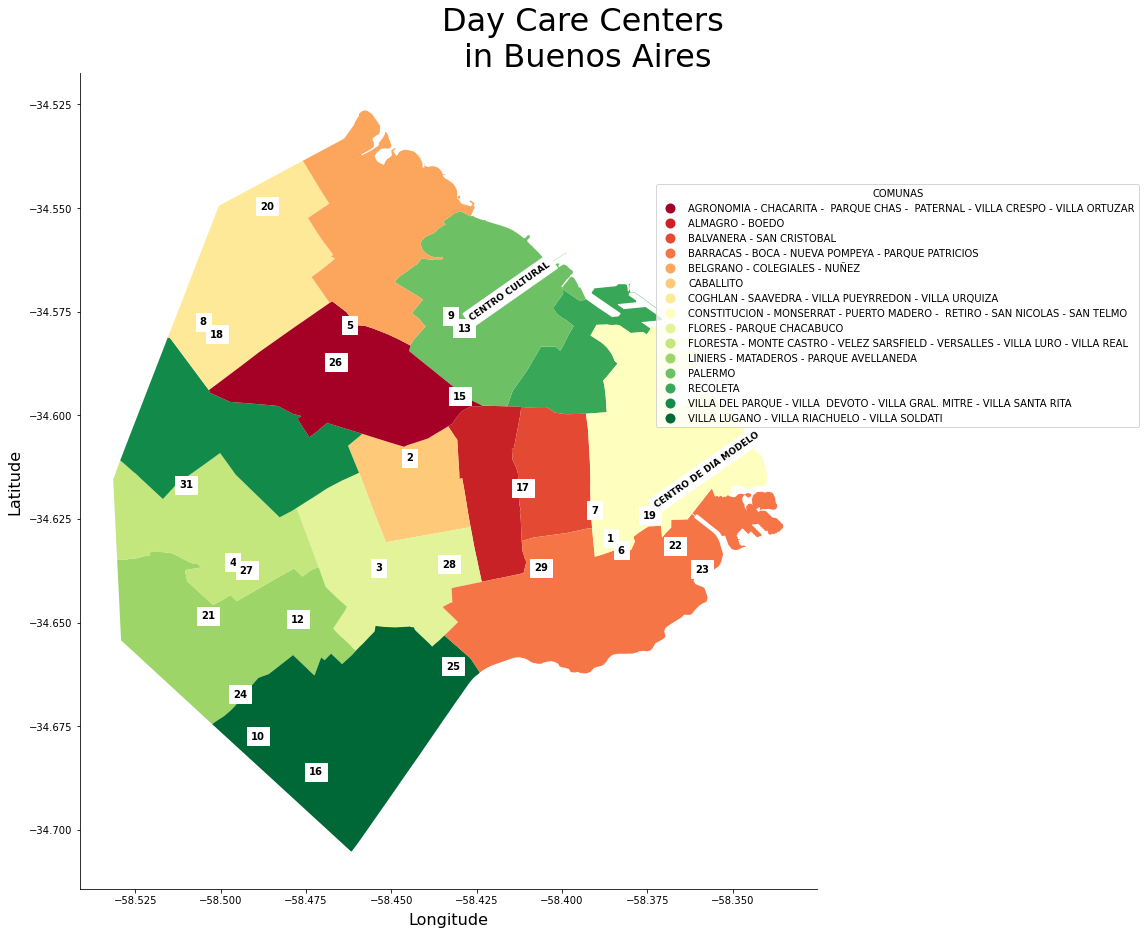

In [7]:
# Plotting the information (powered by 'descartes' library).
 
import descartes
import matplotlib.pyplot as plt

# Districts' layout settings

plt.rcParams["figure.figsize"] = (15, 15)

comunas.plot(
         column = "BARRIOS",
         legend = True, 
         legend_kwds = 
             {"title":"COMUNAS",
              "fontsize": 10,
              "bbox_to_anchor": (1.11, 0.87), # This allows for manual placement of legend.
              "loc":"upper center"}, 
         cmap = "RdYlGn" # Color map for districts
         )

# Centers' coordinates settings

plt.scatter(df_plot["long"], df_plot["lat"], marker = "P", sizes = (23,))

for i, txt in enumerate(df_plot["centro"]):
    
    # The centres mentioned on the 'if' and 'elif' clauses 
    # supersede other centres on close locations,
    # so we need to alter manually their coordinates on "xy", so that everyone is visible.
    
    if txt in ["CENTRO CULTURAL", "CENTRO DE DIA MODELO"]: 
        plt.annotate(txt, 
                 xy = (df_plot["long"][i] + 0.0032, df_plot["lat"][i] + 0.0027), 
                 fontsize = 9,
                 rotation = 35,
                 fontweight = "bold",
                 backgroundcolor = "white")
    elif txt in ["1", "8", "9"]:
        plt.annotate(txt, 
                 xy = (df_plot["long"][i] - 0.003, df_plot["lat"][i] + 0.003), 
                 fontsize = 10, 
                 fontweight = "bold",
                 backgroundcolor = "white")
    else:
        plt.annotate(txt, 
                 xy = (df_plot["long"][i], df_plot["lat"][i]), 
                 fontsize = 10, 
                 fontweight = "bold",
                 backgroundcolor = "white")

# Titles and axis settings

plt.title("Day Care Centers \nin Buenos Aires", size = 32, position = (0.69, 1))
plt.xlabel("Longitude", size = 16, labelpad = 7)
plt.ylabel("Latitude", size = 16, labelpad = 7)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show finished plot

plt.show()

In [8]:
df_cleaned.head(30)

,barrio,comuna,direccion,telefono,horarios_atencion
nombre,,,,,
CENTRO 1,BARRACAS,04,"ALCORTA, AMANCIO AV. 1402",4304-1906,LUN A VIE - 9 A 16 HS
CENTRO 2,CABALLITO,06,ROJAS 881,15-3686-1344,LUN A VIE - 9 A 16 HS
CENTRO 3,FLORES,07,"BONORINO, ESTEBAN, CNEL. AV. 897",4679-0900,LUN A VIE - 9 A 16 HS
CENTRO 4,VILLA LURO,10,YERBAL 5025,4636-0649,LUN A VIE - 9 A 16 HS
CENTRO 5,VILLA ORTUZAR,15,HEREDIA 1253,15-3684-8630,LUN A VIE - 9 A 16 HS
CENTRO 6,BARRACAS,04,"ALCORTA, AMANCIO AV. 1402",4304-1906,LUN A VIE - 9 A 16 HS
CENTRO 7,CONSTITUCION,01,ENTRE RIOS AV. 1260,15-3680-9676,LUN A VIE - 9 A 16 HS
CENTRO 8,VILLA PUEYRREDON,12,CONDARCO 5155,4571-5779,LUN A VIE - 9 A 16 HS
CENTRO 9,PALERMO,14,PARAGUAY 5170,4771-1983,LUN A VIE - 9 A 16 HS
